## Set up

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for statistical data visualization
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler,StandardScaler
import plotly.express as px
# %matplotlib inline
import warnings
warnings.filterwarnings('ignore') # Ignore warnings

## Load Data

In [2]:
# We begin by loading inspecting the data
delta_data = pd.read_csv('delta.csv', index_col=0).reset_index()

In [3]:
delta_data.head()

,Aircraft,Seat Width (Club),Seat Pitch (Club),Seat (Club),Seat Width (First Class),Seat Pitch (First Class),Seats (First Class),Seat Width (Business),Seat Pitch (Business),Seats (Business),...,Video,Power,Satellite,Flat-bed,Sleeper,Club,First Class,Business,Eco Comfort,Economy
0,Airbus A319,0.0,0,0,21.0,36.0,12,0.0,0.0,0,...,0,0,0,0,0,0,1,0,1,1
1,Airbus A319 VIP,19.4,44,12,19.4,40.0,28,21.0,59.0,14,...,1,0,0,0,0,1,1,1,0,0
2,Airbus A320,0.0,0,0,21.0,36.0,12,0.0,0.0,0,...,0,0,0,0,0,0,1,0,1,1
3,Airbus A320 32-R,0.0,0,0,21.0,36.0,12,0.0,0.0,0,...,0,0,0,0,0,0,1,0,1,1
4,Airbus A330-200,0.0,0,0,0.0,0.0,0,21.0,60.0,32,...,1,1,0,1,0,0,0,1,1,1


### Correlation with visualization
Visualize pairwise correlation using scatterplot for columns ``'Accommodation', 'Cruising Speed (mph)', 'Range (miles)', 'Engines', 'Wingspan (ft)', 'Tail Height (ft)', 'Length (ft)'``

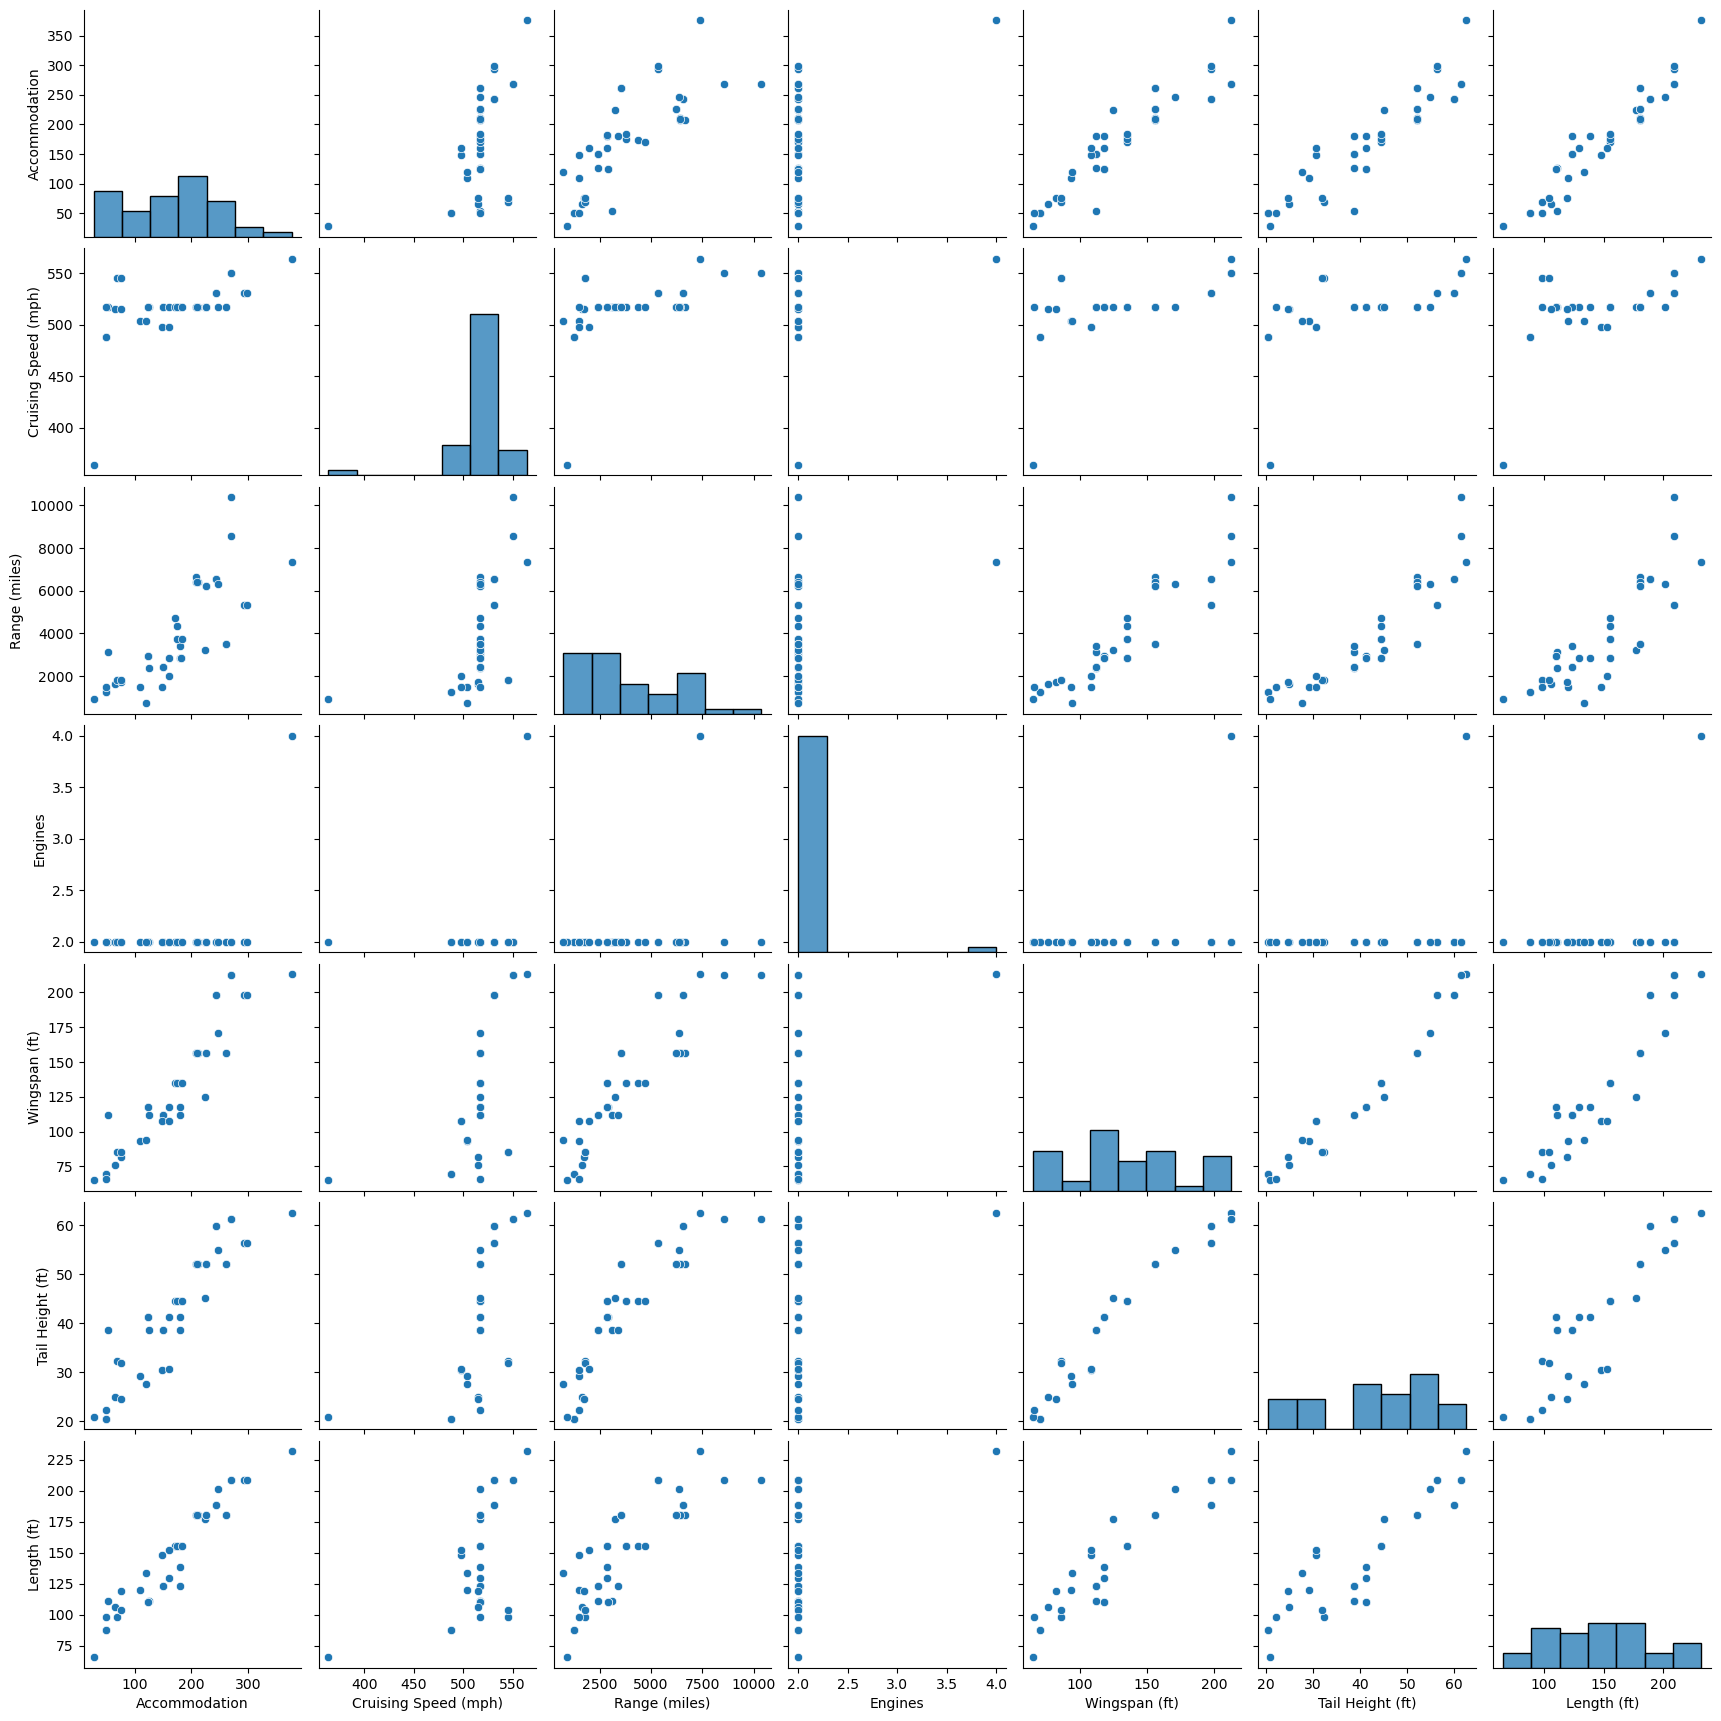

In [4]:
sns.pairplot(delta_data[['Accommodation', 'Cruising Speed (mph)', 'Range (miles)', 'Engines', 'Wingspan (ft)', 'Tail Height (ft)', 'Length (ft)']])

### Data Cleaning

Identify Binary columns

In [5]:
binary_columns = [col for col in delta_data if delta_data[col].nunique() == 2 and set(delta_data[col]) == {0, 1}]
print(binary_columns)

['Wifi', 'Video', 'Power', 'Satellite', 'Flat-bed', 'Sleeper', 'Club', 'First Class', 'Business', 'Eco Comfort', 'Economy']


In [6]:
X = delta_data.drop(columns = ['Wifi', 'Video', 'Power', 'Satellite', 'Flat-bed', 'Sleeper'
                                , 'Club', 'First Class', 'Business', 'Eco Comfort', 'Economy', 'Aircraft'])

In [7]:
y = delta_data['Aircraft']

### PCA

1. Standardize X

In [9]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


# Exercise: feature normalization
X_normalized = StandardScaler().fit_transform(X)
X_normalized

array([[-1.52498570e-01, -1.52498570e-01, -1.52498570e-01,
         9.47529233e-01,  7.29860644e-01,  1.36218320e-01,
        -7.55369162e-01, -7.37409971e-01, -7.11732015e-01,
         2.74971089e-01,  3.12066931e-01, -2.67298535e-01,
        -1.79064316e-02,  1.95170721e-02, -5.70452310e-01,
        -5.91680591e-01,  4.49283589e-02, -6.51215339e-01,
        -1.52498570e-01, -4.85238533e-01, -3.28806418e-01,
        -9.77620275e-01],
       [ 6.55743852e+00,  6.55743852e+00,  6.55743852e+00,
         7.88136024e-01,  9.36214818e-01,  1.63461984e+00,
         1.34692333e+00,  9.65339670e-01,  1.28166301e-01,
        -2.78529538e+00, -2.78994057e+00, -1.92120822e+00,
        -6.47104330e+00, -6.52846062e+00, -2.19745471e+00,
        -1.50783118e+00,  4.49283589e-02, -3.32218201e-01,
        -1.52498570e-01, -4.85238533e-01, -3.28806418e-01,
        -9.77620275e-01],
       [-1.52498570e-01, -1.52498570e-01, -1.52498570e-01,
         9.47529233e-01,  7.29860644e-01,  1.36218320e-01,
    

2. Conduct PCA

In [10]:
# Applying PCA

X_pca = PCA().fit(X_normalized)

3. Calculate the amount of varialce each principal component explain

In [11]:
# Exercise: To show the amount of varialce does each principal component explain
X_pca.explained_variance_ratio_

array([4.63148487e-01, 2.51071052e-01, 1.61265689e-01, 4.68733864e-02,
       3.60892657e-02, 1.84418981e-02, 9.47340752e-03, 4.34022199e-03,
       3.28954319e-03, 1.43450053e-03, 1.20846026e-03, 9.51526552e-04,
       7.88782498e-04, 6.43276642e-04, 3.88597783e-04, 2.71942151e-04,
       1.68280380e-04, 1.11848384e-04, 2.93264482e-05, 1.05081889e-05,
       1.95365408e-32, 1.64787749e-34])

4. visualize the cumulative sum of explained variances

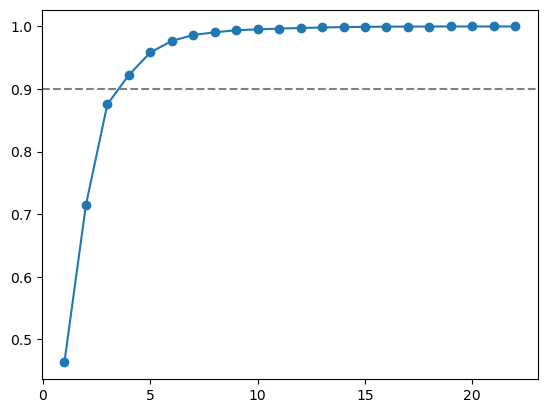

In [12]:
# Exercise: Visualizing the result. Use line plot to show the cummulative explained variance ratio; 

exp_var = X_pca.explained_variance_ratio_
# cumulative sum of variance explained
exp_var_cumsum = np.cumsum(exp_var)

plt.plot(range(1, len(exp_var_cumsum) + 1), exp_var_cumsum, marker='o')
ax = plt.gca()
ax.axhline(0.9, linestyle = '--', color='grey')

### Clustering

1. Visualize SSE using elbow curve for k from 2 to 15

In [13]:
components = PCA(n_components = 5).fit_transform(X_normalized)

components = pd.DataFrame(components, columns=['PC1','PC2','PC3','PC4','PC5'])


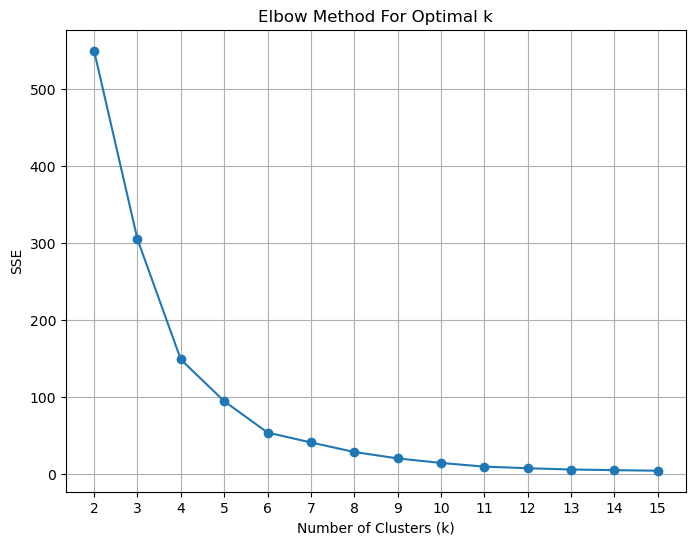

In [14]:
# Exercise: use KMeans with k=3 to group the data into clusters and 
#           visualize how different clusters spread out across the first and second principal components

from sklearn.cluster import KMeans
k_values = range(2, 16)

sse = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(components)
    sse.append(kmeans.inertia_)

# Visualize the SSE by an elbow curve
plt.figure(figsize=(8, 6))
plt.plot(k_values, sse, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('SSE')
plt.xticks(k_values)
plt.grid(True)
plt.show()

2. Based on the graph above, we select the k = 5 for clustering

In [15]:
# k=5 is the optimal point

kmeans = KMeans(n_clusters=5)
kmeans.fit(components)

components['Cluster_Labels'] = kmeans.labels_
components

,PC1,PC2,PC3,PC4,PC5,Cluster_Labels
0,-1.846524,-1.059108,-0.695352,-0.198667,-0.580641,0
1,-6.339099,13.985266,-3.515767,-0.189237,-0.000863,2
2,-1.534916,-1.160258,-0.795416,-0.032170,-0.349624,0
3,-1.534916,-1.160258,-0.795416,-0.032170,-0.349624,0
4,3.956221,0.863601,0.665803,-0.587795,0.159500,1
5,4.128421,1.011687,0.755697,-0.723910,0.047985,1
6,4.502245,0.884321,0.533421,-0.294821,0.429177,1
7,4.374003,0.733624,0.432121,-0.172060,0.529614,1
8,-2.429000,-1.351514,-0.284228,-0.257871,-0.638264,0
9,-1.712051,-1.014837,-0.757266,-0.237264,-0.513604,0


3. Visualize the cluster with scatter plots 

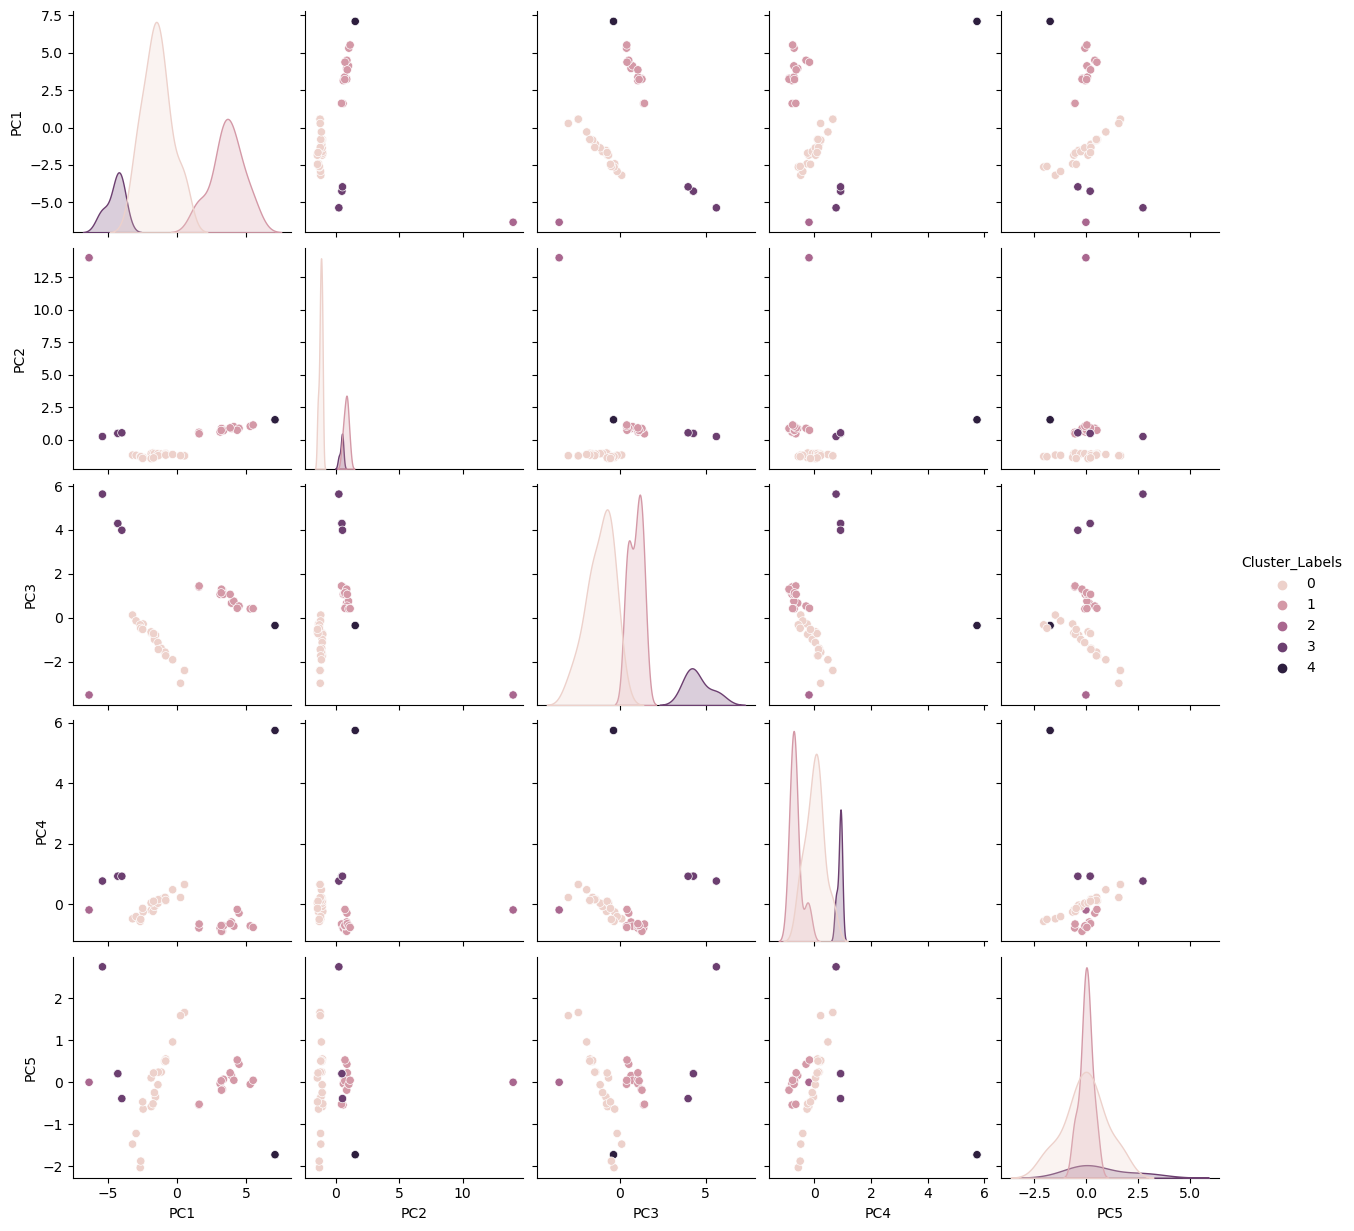

In [16]:
sns.pairplot(components, hue = 'Cluster_Labels')